## Minimal K-Means Clustering Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.base import BaseEstimator

In [3]:
class KMeans(BaseEstimator):
    def __init__(self, k):
        self.k = k
        self._features_num = None
        self._centroids = None

    def _calculate_distances(self, X, centroids):
        return np.linalg.norm(X - centroids[:, None], axis=-1).T

    def _find_lables(self, X):
        distances = self._calculate_distances(X, self._centroids)
        return distances.argsort(axis=1)[:, 0]
        
    def fit(self, X, *_):
        self._features_num = X.shape[1]

        self._labels = np.zeros((X.shape[0],), dtype='int')
        self._centroids = np.random.default_rng().choice(X, size=self.k, replace=False, axis=0)

        while True:
            new_labels = self._find_lables(X)

            if np.array_equal(new_labels, self._labels):
                break

            self._labels = new_labels
            
            for i in range(self.k):
                cluster_X = X[self._labels == i]
                self._centroids[i] = cluster_X.mean(axis=0)

    def predict(self, X):
        assert X.shape[1] == self._features_num
        
        return self._find_lables(X)

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.1)

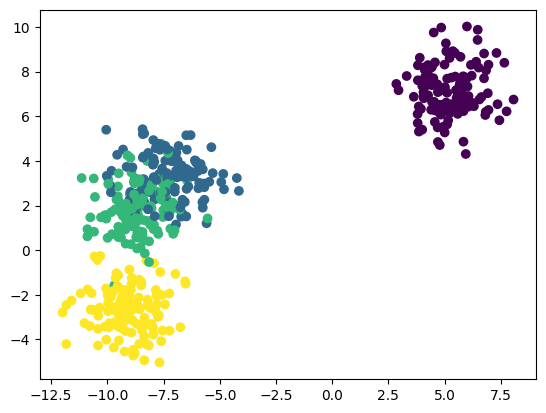

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
cls = KMeans(4)
cls.fit(X)

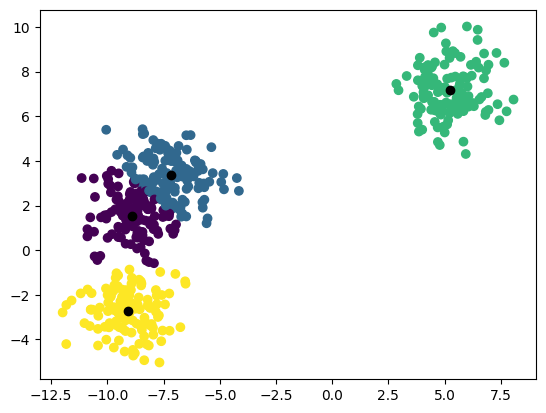

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=cls._labels)
plt.scatter(cls._centroids[:, 0], cls._centroids[:, 1], color='black')

In [8]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, cls.predict(X))

0.7563016253846951

In [9]:
X, y = make_blobs(n_samples=5_000, n_features=20, centers=5, cluster_std=2)

In [10]:
from sklearn.model_selection import cross_val_score
from scipy.stats import hmean
hmean(cross_val_score(KMeans(k=5), X, y, scoring='adjusted_rand_score', cv=10, n_jobs=-1))

0.7523461239180751

In [11]:
from sklearn.cluster import KMeans as sk_cls
hmean(cross_val_score(sk_cls(n_clusters=5, init='random', n_init=1), X, y, scoring='adjusted_rand_score', cv=10, n_jobs=-1))

0.7782402496327401

In [12]:
hmean(cross_val_score(sk_cls(n_clusters=5, n_init='auto'), X, y, scoring='adjusted_rand_score', cv=10, n_jobs=-1))

1.0